In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('D:\\24 - Machine_Learning\\download files\\glass.data',sep=',')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [4]:
col_names = ['Id','RI','NA','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [5]:
data.columns = col_names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      213 non-null    int64  
 1   RI      213 non-null    float64
 2   NA      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [7]:
data

,Id,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


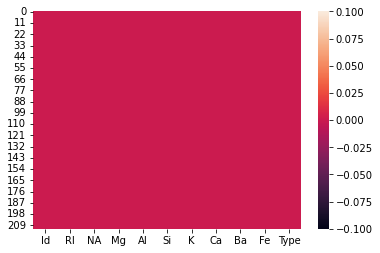

In [8]:
sns.heatmap(data.isna());

In [9]:
cor = data.corr()
cor

,Id,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,0.451437,-0.078151,0.878113
RI,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
NA,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.451437,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090


<AxesSubplot:>

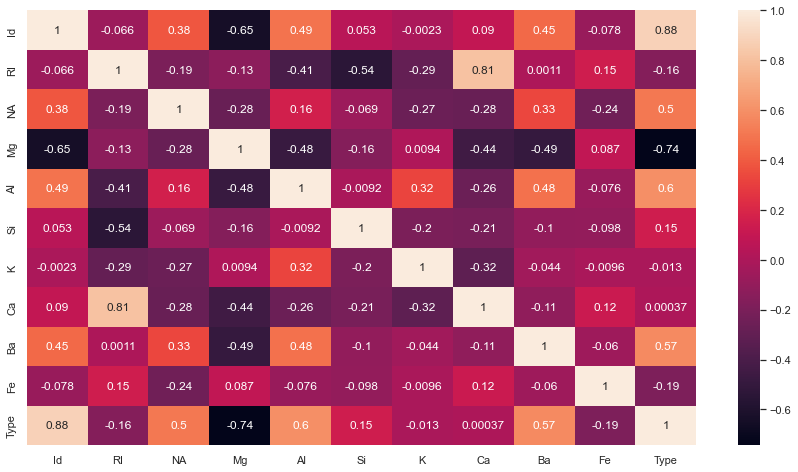

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,annot=True)

In [11]:
nb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [12]:
x = data.drop(columns=['Type'])
y = data['Type']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=4)

In [14]:
nb.fit(xtrain, ytrain)
gnb.fit(xtrain, ytrain)
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [15]:
ypred = nb.predict(xtest)

In [16]:
accuracy_score(ytest,ypred)

0.4883720930232558

In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.39      0.92      0.55        13
           2       0.67      0.11      0.19        18
           5       0.00      0.00      0.00         4
           6       0.50      1.00      0.67         1
           7       0.86      0.86      0.86         7

    accuracy                           0.49        43
   macro avg       0.48      0.58      0.45        43
weighted avg       0.55      0.49      0.40        43



D:\24-Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\24-Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\24-Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
sns.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

NameError: name 'cf' is not defined

In [ ]:
cf = confusion_matrix(ytest,ypred)
cf

In [ ]:
ypred = gnb.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
sns.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

In [ ]:
cf = confusion_matrix(ytest,ypred)
cf

In [ ]:
ypred = mnb.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
cf = confusion_matrix(ytest,ypred)
cf

In [ ]:
sn.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

The accuracy BernoulliNB is 0.4883720930232558
The accuracy GaussianNB is 0.7906976744186046
The accuracy MultinomialNB is 0.7906976744186046